# Exploratory Data Analysis

## Univariate EDA

### Diamond Prices

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

### Importing and preparation

In [2]:
data_path =  'https://raw.githubusercontent.com/tec03/Datasets/main/datasets/diamonds.csv'
diamonds = pd.read_csv(data_path)
## Preparation done from Chapter 2
diamonds = diamonds.loc[(diamonds['x']>0) | (diamonds['y']>0)]
diamonds.loc[11182, 'x'] = diamonds['x'].median()
diamonds.loc[11182, 'z'] = diamonds['z'].median()
diamonds = diamonds.loc[~((diamonds['y'] > 30) | (diamonds['z'] > 30))]
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['cut'], prefix='cut', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['color'], prefix='color', drop_first=True)], axis=1)
diamonds = pd.concat([diamonds, pd.get_dummies(diamonds['clarity'], prefix='clarity', drop_first=True)], axis=1)

In [3]:
numerical_features = ['price', 'carat', 'depth', 'table', 'x', 'y', 'z']
categorical_features = ['cut', 'color', 'clarity']

In [4]:
def desc_num_feature(feature_name, bins=30, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    diamonds[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name, size=15)
    plt.figtext(1,0.15, str(diamonds[feature_name].describe().round(2).astype(str)), size=17)

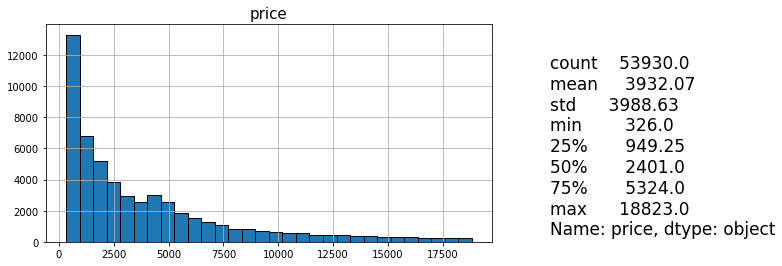

In [5]:
desc_num_feature('price')

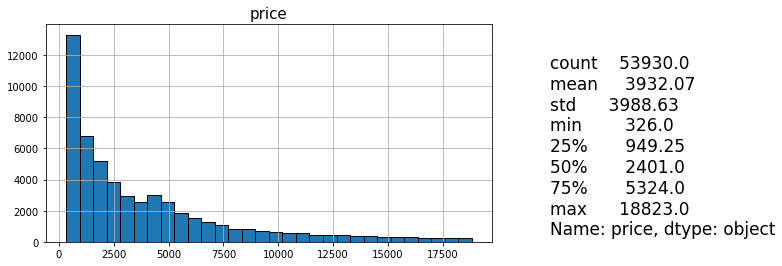

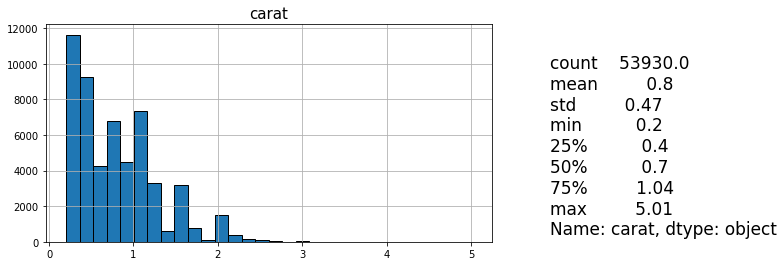

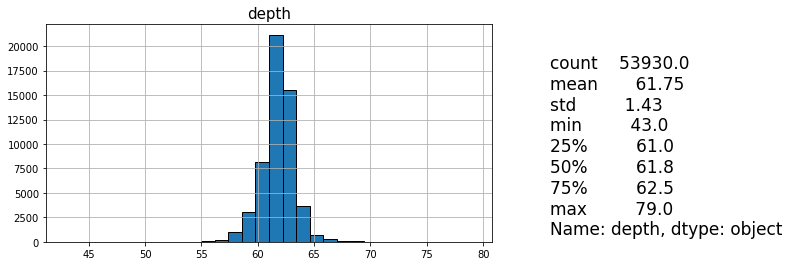

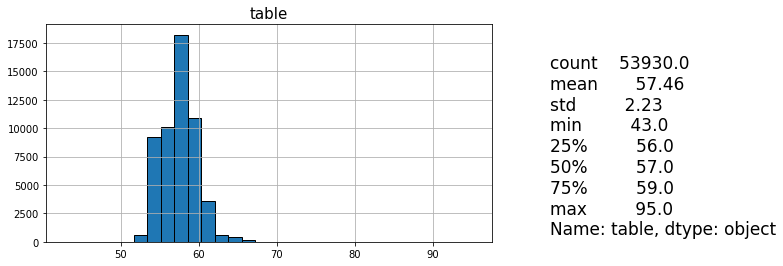

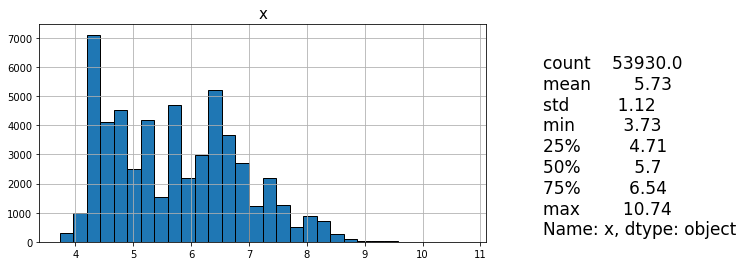

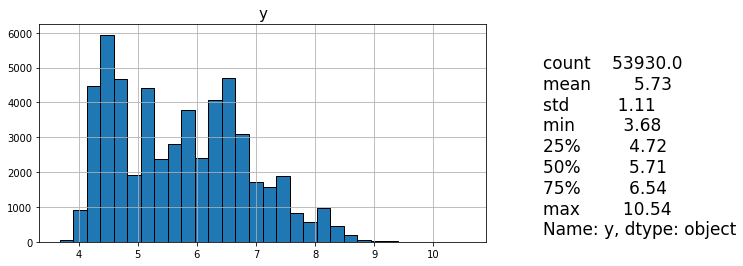

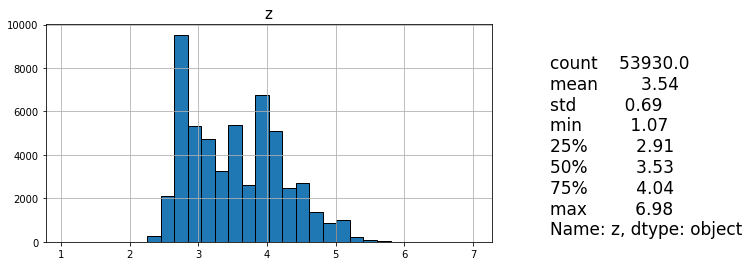

In [6]:
for x in numerical_features:
    desc_num_feature(x)

### Univariate EDA for categorical features

           count  percent
Ideal      21549     40.0
Premium    13788     25.6
Very Good  12080     22.4
Good        4904      9.1
Fair        1609      3.0


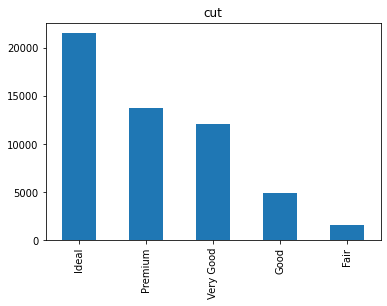

In [7]:
feature = categorical_features[0]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

   count  percent
G  11290     20.9
E   9795     18.2
F   9540     17.7
H   8301     15.4
D   6774     12.6
I   5422     10.1
J   2808      5.2


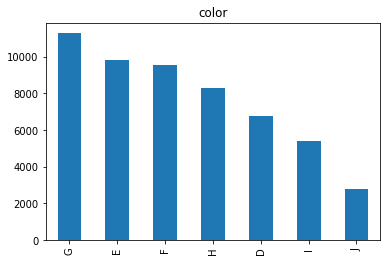

In [8]:
feature = categorical_features[1]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

      count  percent
SI1   13065     24.2
VS2   12256     22.7
SI2    9190     17.0
VS1    8168     15.1
VVS2   5066      9.4
VVS1   3654      6.8
IF     1790      3.3
I1      741      1.4


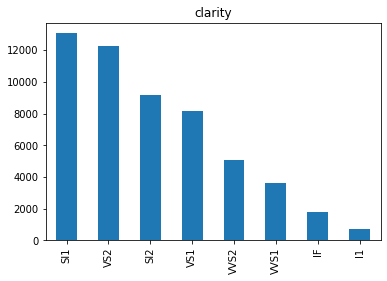

In [9]:
feature = categorical_features[2]
count = diamonds[feature].value_counts()
percent = 100*diamonds[feature].value_counts(normalize=True)
df = pd.DataFrame({'count':count, 'percent':percent.round(1)})
print(df)
count.plot(kind='bar', title=feature);

In [10]:
def desc_cat_feature(feature_name, edgecolor='k', **kwargs):
    fig, ax = plt.subplots(figsize=(8,4))
    diamonds[feature_name].hist(bins=bins, edgecolor=edgecolor, ax=ax, **kwargs)
    ax.set_title(feature_name, size=15)
    plt.figtext(1,0.15, diamonds[feature_name].describe().round(2), size=17)

## Bivariate EDA

### Two numerical features

#### The scatter plot

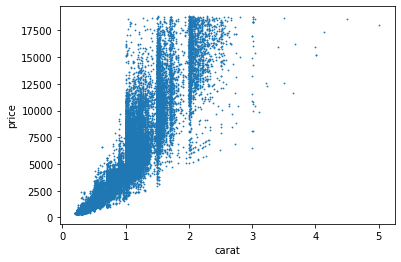

In [11]:
diamonds.plot.scatter(x='carat', y='price', s=0.6);

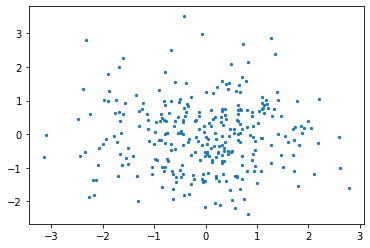

In [12]:
r1 = np.random.normal(size=300)
r2 = np.random.normal(size=300)
plt.scatter(r1, r2, s=5);

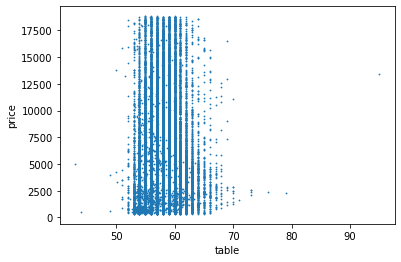

In [13]:
diamonds.plot.scatter(x='table', y='price', s=0.6);

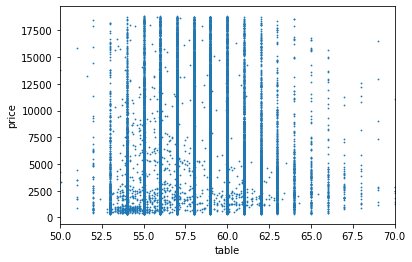

In [14]:
diamonds.plot.scatter(x='table', y='price', s=0.6, xlim=(50,70));

In [ ]:
sns.pairplot(diamonds[numerical_features], plot_kws={"s": 2});

In [ ]:
sns.pairplot(diamonds[numerical_features], plot_kws={"s": 2}, diag_kind='kde');

In [ ]:
diamonds[numerical_features].corr()

In [ ]:
dim_features = diamonds[['carat','x','y','z']]
sns.pairplot(dim_features,plot_kws={"s": 3});

In [ ]:
dim_features.corr()

### Two categorical features

In [ ]:
pd.crosstab(diamonds['cut'], diamonds['color'])  

In [ ]:
ct = pd.crosstab(diamonds['cut'], diamonds['color'], margins=True, margins_name='Total')
ct

In [ ]:
100*ct.div(ct['Total'], axis=0).round(3)

In [ ]:
basic_ct = pd.crosstab(diamonds['cut'], diamonds['color'])
basic_ct.plot(kind='bar');

In [ ]:
basic_ct.plot(kind='bar', stacked=True);

In [ ]:
ct.div(ct['Total'], axis=0).iloc[:,:-1].plot(kind='bar', stacked=True);

### A numerical vs. a categorical feature

In [ ]:
sns.boxplot(r1, orient='v');

In [ ]:
r1[1] = 3.5
r1[2] = 3.7
r1[3] = -3

In [ ]:
sns.boxplot(r1, orient='v');

In [ ]:
sns.boxplot(x='cut', y='price', data=diamonds.loc[diamonds['price']<10000]);

In [ ]:
diamonds.groupby('cut')['price'].agg(np.median).sort_values()

In [ ]:
medians_by_clarity = diamonds.groupby('clarity')['price'].agg(np.median).sort_values()
print(medians_by_clarity)
sns.boxplot(x='clarity', y='price', data=diamonds.loc[diamonds['price']<10000],
            order=medians_by_clarity.index);